In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import scoring as score # para hacer los reportes de puntajes
from time import time

from sklearn import preprocessing
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.preprocessing import RobustScaler  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

properati = pd.read_csv('datos/properati_3.csv',error_bad_lines=False)

<IPython.core.display.Javascript object>

In [106]:
properati=properati.groupby("place_name").filter(lambda x: len(x)>5)

In [107]:
#paso features con strings a numericos
le_barrio = preprocessing.LabelEncoder()
barrios=properati['place_name']
le_barrio.fit(barrios)
properati['place_name'] = le_barrio.transform(barrios)

le_barrio = preprocessing.LabelEncoder()
barrios=properati['state_name']
le_barrio.fit(barrios)
properati['state_name'] = le_barrio.transform(barrios)

le_tipo = preprocessing.LabelEncoder()
tipos_prop=properati['property_type']
le_tipo.fit(tipos_prop)
properati['property_type'] = le_tipo.transform(tipos_prop)

### Nota: Kmeans llama inertia a la funcion costo/distorsion. Me falto normalizar antes de mandarlo

In [108]:
precios_promedio = properati.groupby("place_name").mean()["price_usd_per_m2"]

In [109]:
X= zip(precios_promedio,np.arange(0,551,1))

In [ ]:
%%notify

km = KMeans(n_jobs=-1)

n_clusters  = np.arange(30,300,1)

X_train, X_test= train_test_split(X, test_size=0.2)

param_grid = {"n_clusters": n_clusters}

search = RandomizedSearchCV(km, param_distributions=param_grid ,cv=5,n_iter=100) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

In [110]:
%%notify

mini = MiniBatchKMeans()

n_clusters  = np.arange(5,10,1)

X_train, X_test= train_test_split(X, test_size=0.2)

param_grid = {"n_clusters": n_clusters}

search = GridSearchCV(mini, param_grid=param_grid ,cv=5) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 0.59 segundos para 5 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: -11434185.973 (std: 5005829.256)
Promedio validation score: -4848894.813 (std: 4080842.131)
Promedio fit time: 0.024s
Hiper-parametros: {'n_clusters': 8}

Puesto: 2
Promedio training score: -9010958.429 (std: 3868167.783)
Promedio validation score: -7350687.008 (std: 10619904.794)
Promedio fit time: 0.022s
Hiper-parametros: {'n_clusters': 9}

Puesto: 3
Promedio training score: -17154615.967 (std: 9609587.379)
Promedio validation score: -8505740.800 (std: 10417536.973)
Promedio fit time: 0.021s
Hiper-parametros: {'n_clusters': 7}

Puesto: 4
Promedio training score: -15487772.730 (std: 4078585.924)
Promedio validation score: -8638369.804 (std: 10234269.329)
Promedio fit time: 0.017s
Hiper-parametros: {'n_clusters': 6}

Puesto: 5
Promedio training score: -22126949.406 (std: 9738026.885)
Promedio validation score: -10102530.366 (std: 10009606.054)
Promedio fit time: 0.018s
Hiper-parame

<IPython.core.display.Javascript object>

In [111]:
res = search.best_estimator_.predict(X)

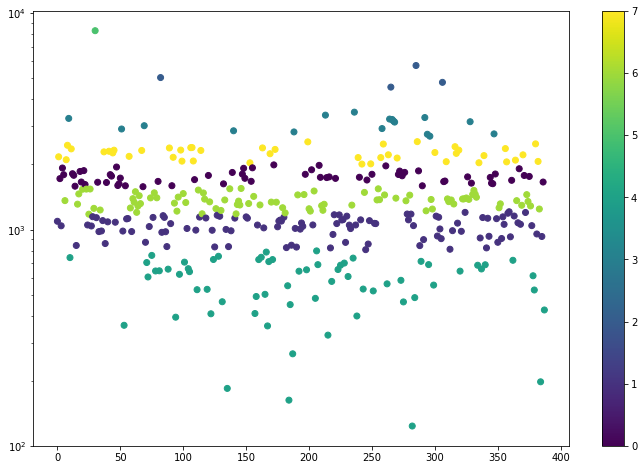

In [112]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(0,len(precios_promedio),1),precios_promedio,c=res)
plt.colorbar()
plt.yscale("log")
plt.show()